# Analise a frequência das palavras-chave nos tweets


##### ATENÇÃO: aparentemente durante a coleta de dados alguns dos twees foram coletados truncados (com parte do conteúdo não capturada). O atributo "truncated" pode ser usado para identificá-los.

------------------------------------------------------------------------------------------------------------------------

### Função que trata e tokeniza textos
    obs: já possui eliminação de stopwords

In [7]:
from nltk.corpus import stopwords
#talvez seja necessário baixar as stopwords com o comando no CMD: python -m nltk.downloader stopwords
from string import punctuation
from nltk.tokenize import TweetTokenizer
import re

#Instância um objeto do tipo TweetTokenizer que já deixa tudo em minúsculo, trata espaços,  
# e elimina menções (mas não tira números).
tweet_tokenizer = TweetTokenizer(strip_handles=True, reduce_len=True, preserve_case=False) 

#definição das stopwords (inclui pontuação para eliminá-la, caso apareça)
stopwords = set(stopwords.words('portuguese') + list(punctuation))

def tokenizar_texto(texto_completo):
    texto_tokenizado_lst = tweet_tokenizer.tokenize(texto_completo)
    palavras_sem_stopwords = [palavra for palavra in texto_tokenizado_lst if palavra not in stopwords]
    return palavras_sem_stopwords
   
    #texto_tokenizado_str = ','.join(texto_tokenizado_lst) #linha usada só se o arquivo for salvo em uma tabela
    #with open('tokens_tweets_23abr.csv','a', encoding="utf-8") as fd:
    #            fd.write(texto_tokenizado_str)                           #escreve uma linha de texto tokenizado no csv
    #            fd.write("\n")

### Função para salvar o dicionário de contagem de palavras-chave#

In [59]:
from nltk.probability import FreqDist
from collections import defaultdict

def guardar_contagem(dicionario_contagem):    
    with open('Contagem_palavras_chave.csv', 'w', encoding="utf-8") as f:
        f.write("Palavra-chave,Ocorrências\n")
        for key in dicionario_contagem.keys():
            f.write("%s,%s\n"%(key,dicionario_contagem[key]))


### Leitura dos dados, aplicação do tratamento e da tokenização
obs: pode demorar

In [34]:
## Define a função que lê os dados e retorna um dicionario com o texto de todos os tweets ##
import pandas as pd
from collections import defaultdict
from IPython.display import clear_output

#Lista de palavras-chave. O termo 'distanciamento social' foi alterado para 'distanciamento' porque o programa ainda não consegue lidar com bigramas
Palavras_chave = ['corona', 'covid', 'coronavírus', 'covid19', 'quarentena', 'hidroxicloroquina', 'cloroquina', 'confinamento', 'distanciamento', 'aglomeracão', 'aglomerações', 'sars', 'covid-19']

Sumario_dict = defaultdict(int)     ##Criação de um tipo diferente de dicionário, capaz de fazer contagens...

def processar_tweets_23abr():
    contador = 0
    dados = pd.read_json('tweets_222_23abr2020.json', convert_dates=False, lines=True, chunksize=500)
    #pd.set_option("display.max_colwidth", 100000)  #Não deixa trazer visualizações truncadas (não interfere no resultado)
    
    for df_tweets_retweets in dados:
       
        #Cria um novo dataframe contendo somente os tweets (que não tem o atributo 'retweeted_status')
        df_tweets = df_tweets_retweets[pd.isnull(df_tweets_retweets['retweeted_status'])]
        
        #Percorre esse novo dataframe selecionando apenas o texto de cada tweet
        for texto_tweet in df_tweets["text"]:  #aqui é possivel acessar outros atributos dos tweets ao alterar a chave "text"
            
            clear_output()
            
            contador += 1
            print("%s tweets processados..." %(str(contador))) ##mostra o número de tweets processados até o momento
            
            texto_tokenizado = tokenizar_texto(texto_tweet)   ##Aqui o texto é limpo e tokenizado
            
            
            #print(texto_tokenizado)
            
            
            for palavra in texto_tokenizado:                  ##Aqui as palavras-chave são contadas e colocadas em um dict
                if palavra in Palavras_chave:                 
                    Sumario_dict[palavra] += 1 
            
            #print(Sumario_dict)
         
        #break          #tire o break para lidar com todos os dados
    
    
    print(Sumario_dict)
    guardar_contagem(Sumario_dict)
    
            
#processar_tweets_23abr()   <-------------------- use para ativar a função

2531075 tweets processados...
defaultdict(<class 'int'>, {'quarentena': 1185511, 'corona': 272468, 'cloroquina': 47555, 'covid': 194604, 'hidroxicloroquina': 10155, 'distanciamento': 8943, 'confinamento': 11667, 'sars': 558})


### Leitura do dicionario e plotagem

       Palavra-chave  Ocorrências
0         quarentena      1185511
1             corona       272468
3              covid       194604
2         cloroquina        47555
6       confinamento        11667
4  hidroxicloroquina        10155
5     distanciamento         8943
7               sars          558


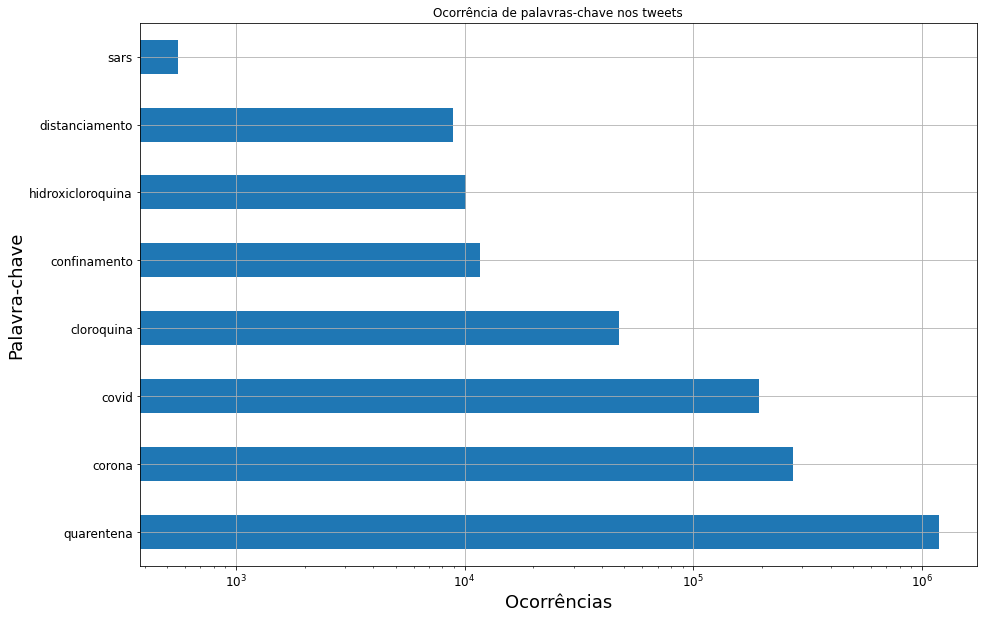

In [89]:
##teste##
##apesar de no CSV os emojis aparecerem desconfigurados (no excell), quando eles são lidos no pandas, são reconfigurados normalmente"
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_colwidth', None)
df_contagem = pd.read_csv('Contagem_palavras_chave.csv', sep = ",") #coloque header=None se não houver cabeçalho
df_contagem = df_contagem.sort_values(by='Ocorrências', ascending=False)

print(df_contagem)

grafico_barras = df_contagem.plot(x ='Palavra-chave', y='Ocorrências', kind='barh', title ="Ocorrência de palavras-chave nos tweets",figsize=(15,10),legend=False, fontsize=12)
grafico_barras.set_ylabel("Palavra-chave",fontsize=18)
grafico_barras.set_xlabel("Ocorrências",fontsize=18)

plt.grid()
plt.xscale("log")
plt.show()

